In [25]:
!uv pip install matplotlib

Resolved 11 packages in 221ms                                        
Prepared 5 packages in 1.12s                                             
Installed 7 packages in 33ms                                
 + contourpy==1.3.2
 + cycler==0.12.1
 + fonttools==4.57.0
 + kiwisolver==1.4.8
 + matplotlib==3.10.1
 + pillow==11.2.1
 + pyparsing==3.2.3


In [26]:
from matplotlib import pyplot as plt

In [1]:
import numpy as np

In [ ]:
X = np.random.random(
    (60, 2)
)

In [123]:
"""

X = [
    (0.4, 2.5),
    ...
]


TODO: could partitiion space for faster searching?
"""
    
def k_means(X, k: int, max_movement_per_iter: float) -> np.array:
    m, d = X.shape
    assert k <= m
    init_centroid_idxes = np.random.choice(m, size=k, replace=False)
    centroids = X[init_centroid_idxes]
    k_range = np.arange(k)
    while True:
        point_position_sums = np.zeros((k, d))
        centroid_id_to_count = np.zeros((k,1))
        manhattan_dists = abs(X[..., None] - centroids.T).sum(axis=1)
        closest_centroid_idxes = manhattan_dists.argmin(axis=1) # (m,) -> the closest centroid idxes for each m
        one_hot = closest_centroid_idxes[:, None] == np.arange(k)[None, :]
        one_hot_unsqueezed = one_hot[:, None, :].astype(float)
        X_unsqueezed = X[:, :, None]
        selected_vals = one_hot_unsqueezed * X_unsqueezed # TODO: consider selecting the vals with indexing instead of multiplying by the mask
        centroid_sums = selected_vals.sum(axis=0).T
        centroid_counts = one_hot.sum(axis=0)
        if any(centroid_counts == 0):
            raise Exception("At least one centroid was not assigned any points.")
        new_centroids = centroid_sums / centroid_counts[:, None]
        if max(abs(centroids - new_centroids).sum(axis=1)) < max_movement_per_iter:
            centroids = new_centroids
            break
        centroids = new_centroids
    return centroids

In [124]:
means = k_means(X, 4, 1e-4)

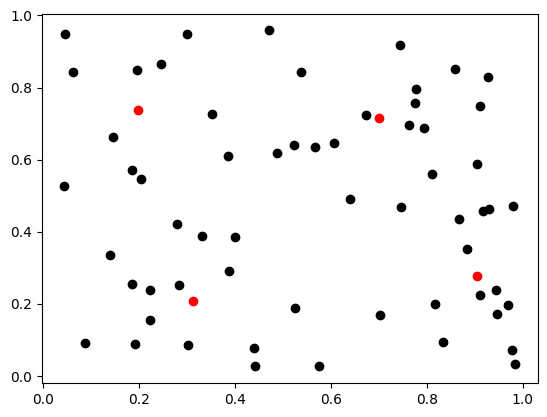

In [125]:
plt.scatter(X[:, 0], X[:, 1], color='black')
plt.scatter(means[:, 0], means[:, 1], color='red')

In [54]:
X = np.random.random(
    (4, 2)
)

In [55]:
C = np.random.random(
    (3, 2)
)

In [57]:
np.arange(5)

array([0, 1, 2, 3, 4])

In [58]:
binary_matrix = np.zeros((3,2,4))

In [60]:
binary_matrix[np.arange(3)==np.array([1,2,2]),:,:] = 1

In [100]:
binary_matrix.min()

np.float64(0.0)